In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("data/Exercise1DataSet.csv")
df

,x,y
0,-4.809264,-92.911272
1,-4.722680,-98.506658
2,-3.852326,-63.212666
3,-3.687668,-51.036538
4,-3.602674,-54.784580
...,...,...
95,6.890595,39.282364
96,7.118811,49.384561
97,7.178848,51.564875
98,7.942389,85.676290


In [3]:
x = np.array(df.x).reshape(-1, 1)
y = df.y.values

In [4]:
x.shape

(100, 1)

In [5]:
y.shape

(100,)

Text(0, 0.5, 'Y')

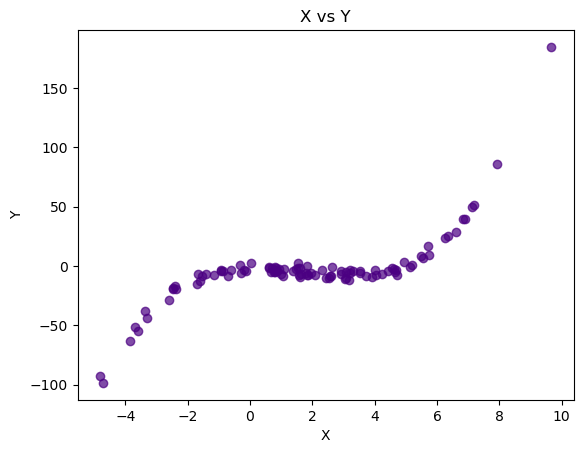

In [6]:
plt.scatter(x, y, marker="o", color="indigo", alpha=0.7)
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")

In [7]:
# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [8]:
# Splitting train and validation data
x_trainv, x_valid, y_trainv, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [9]:
def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
    
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)

    x_train_poly = poly_features.fit_transform(x_trainv)
    x_valid_poly = poly_features.fit_transform(x_valid)

    poly_model = LinearRegression()
    poly_model.fit(x_train_poly, y_trainv)

    y_traing_predict = poly_model.predict(x_train_poly)
    y_valid_predict = poly_model.predict(x_valid_poly)
    
    mse_train = mean_squared_error(y_trainv, y_traing_predict)
    mse_valid = mean_squared_error(y_valid, y_valid_predict)

    return (mse_train, mse_valid, degree)

In [10]:
a = []
for i in range(1, 8):
    a.append(create_polynomial_regression_model(i))
df = pd.DataFrame(a, columns= ["Training Error", "Validation Error", "Degree"])
df

,Training Error,Validation Error,Degree
0,498.772611,359.808438,1
1,463.850591,303.305084,2
2,8.458716,9.337411,3
3,8.458182,9.282428,4
4,8.109758,10.145729,5
5,8.109556,10.115892,6
6,7.379379,10.680336,7


In [11]:
df.sort_values("Validation Error")

,Training Error,Validation Error,Degree
3,8.458182,9.282428,4
2,8.458716,9.337411,3
5,8.109556,10.115892,6
4,8.109758,10.145729,5
6,7.379379,10.680336,7
1,463.850591,303.305084,2
0,498.772611,359.808438,1


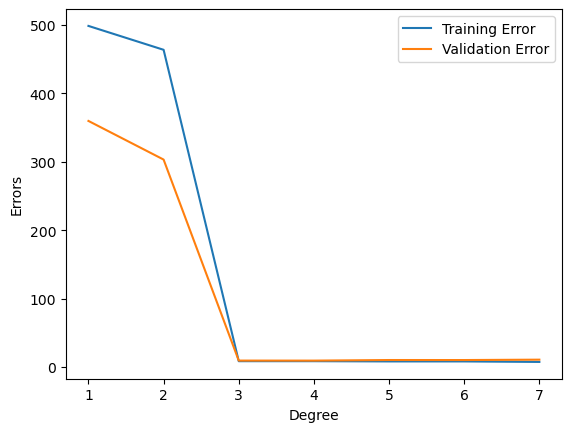

In [12]:
plt.plot(df.Degree, df["Training Error"], label = "Training Error")
plt.plot(df.Degree, df["Validation Error"], label = "Validation Error")
plt.xlabel("Degree")
plt.ylabel("Errors")
plt.legend(loc="best")

In [13]:
#Let's finally fit a model with a chosen order of polynomial
poly_features = PolynomialFeatures(degree=7, include_bias=False)

x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

y_predict = poly_model.predict(x_test_poly)
mean_squared_error(y_test, y_predict)

9.378186697715982

Text(0, 0.5, 'Errors')

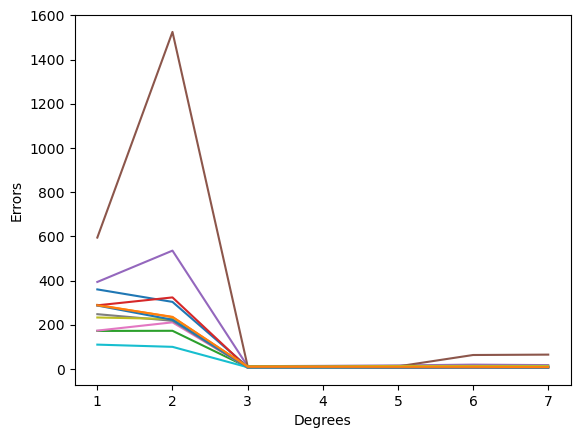

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(1, 13):
    a = []
    x_trainv, x_valid, y_trainv, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=i)
    for j in range(1, 8):
        a.append(create_polynomial_regression_model(j))
    df = pd.DataFrame(a, columns=["Training Error", "Validation Error", "Degree"])
    ax.plot(df["Degree"], df["Validation Error"])
    
ax.set_xlabel("Degrees")
ax.set_ylabel("Errors")

In [15]:
df

,Training Error,Validation Error,Degree
0,504.909549,287.805806,1
1,472.546397,235.605500,2
2,8.303642,9.535044,3
3,8.300970,9.431805,4
4,8.125661,9.347310,5
5,8.125014,9.291099,6
6,7.711134,8.272292,7


# Leave One Out Validation

In [16]:
# Splitting train and test data for LeaveOneOut
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [17]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
LeaveOneOutErrors=[]

for train_index, validation_index in loo.split(x_train):
    x_trainv, x_valid = x_train[train_index], x_train[validation_index]
    y_trainv, y_valid = y_train[train_index], y_train[validation_index]
    LeaveOneOutErrors.append(create_polynomial_regression_model(3))

df = pd.DataFrame(LeaveOneOutErrors, columns=["Traning Error", "Validation Error", "Degree"])
df

,Traning Error,Validation Error,Degree
0,8.207171,27.993140,3
1,8.512889,0.974173,3
2,8.492817,2.757093,3
3,8.353116,13.890290,3
4,8.486752,3.117036,3
...,...,...,...
75,8.401970,10.025685,3
76,8.398941,10.383065,3
77,8.362500,13.189580,3
78,8.328216,16.126212,3


In [18]:
df.groupby("Degree").mean()

,Traning Error,Validation Error
Degree,,
3,8.409183,10.257541


In [19]:
loo = LeaveOneOut()
LeaveOneOutCV = []

for i in range(1, 8):
    LeaveOneOutErrors=[]
    for train_index, validation_index in loo.split(x_train):
        x_trainv, x_valid = x_train[train_index], x_train[validation_index]
        y_trainv, y_valid = y_train[train_index], y_train[validation_index]
        LeaveOneOutErrors.append(create_polynomial_regression_model(i))
        df = pd.DataFrame(LeaveOneOutErrors, columns=["Traning Error", "Validation Error", "Degree"])
        
    LeaveOneOutCV.append([df["Validation Error"].mean(), i])
LeaveOneOutCV_df = pd.DataFrame(LeaveOneOutCV, columns=["Validation Error", "Degree"])
LeaveOneOutCV_df

,Validation Error,Degree
0,522.536143,1
1,615.206270,2
2,10.257541,3
3,12.556636,4
4,15.705177,5
5,34.482614,6
6,19.589947,7


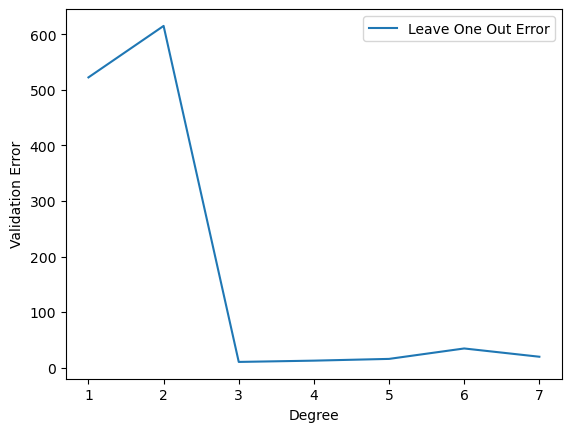

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(LeaveOneOutCV_df.Degree, LeaveOneOutCV_df["Validation Error"], label= "Leave One Out Error")
ax.set_xlabel("Degree")
ax.set_ylabel("Validation Error")
ax.legend(loc="best")

In [21]:
#Let's finally fit a model with a chosen order of polynomial
poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

y_pred = poly_model.predict(x_test_poly)
mean_squared_error(y_test, y_pred)

9.569802779249255

# K-Fold Validation

In [22]:
from sklearn.model_selection import KFold

In [23]:
# Splitting train and test data for LeaveOneOut
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [24]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
CVErrors = []

for train_index, validation_index in cv.split(x_train):
    x_trainv, x_valid = x_train[train_index], x_train[validation_index]
    y_trainv, y_valid = y_train[train_index], y_train[validation_index]
    CVErrors.append(create_polynomial_regression_model(2))

df = pd.DataFrame(CVErrors, columns=["Traning Error", "Validation Error", "Degree"])
df

,Traning Error,Validation Error,Degree
0,457.128794,302.181206,2
1,423.814064,451.290607,2
2,252.049337,1400.161591,2
3,465.197494,241.794972,2
4,430.573414,406.104040,2


In [25]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
CVErrorCV = []

for i in range(1, 8):
    CVErrors = []
    for train_index,  validation_index in cv.split(x_train):
        x_trainv, x_valid = x_train[train_index], x_train[validation_index]
        y_trainv, y_valid = y_train[train_index], y_train[validation_index]
        CVErrors.append(create_polynomial_regression_model(i))
        df = pd.DataFrame(CVErrors, columns=["Traning Error", "Validation Error", "Degree"])
    CVErrorCV.append([df["Validation Error"].mean(), i])
    
KFoldCV_df = pd.DataFrame(CVErrorCV, columns=["Validation Error", "Degree"])
KFoldCV_df

,Validation Error,Degree
0,491.023574,1
1,560.306483,2
2,10.320544,3
3,12.012723,4
4,18.650768,5
5,42.742494,6
6,25.709752,7


In [26]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
CVErrors = []

for i in range(1, 8):
    for train_index, validation_index in cv.split(x_train):
        x_trainv, x_valid = x_train[train_index], x_train[validation_index]
        y_trainv, y_valid = y_train[train_index], y_train[validation_index]
        CVErrors.append(create_polynomial_regression_model(i))
    df = pd.DataFrame(CVErrors, columns=["Traning Error", "Validation Error", "Degree"])
    
kfoldCV_by_degree = df.groupby("Degree").mean()
kfoldCV_by_degree = kfoldCV_by_degree.reset_index()
kfoldCV_by_degree[['Degree', 'Validation Error']]

,Degree,Validation Error
0,1,491.023574
1,2,560.306483
2,3,10.320544
3,4,12.012723
4,5,18.650768
5,6,42.742494
6,7,25.709752


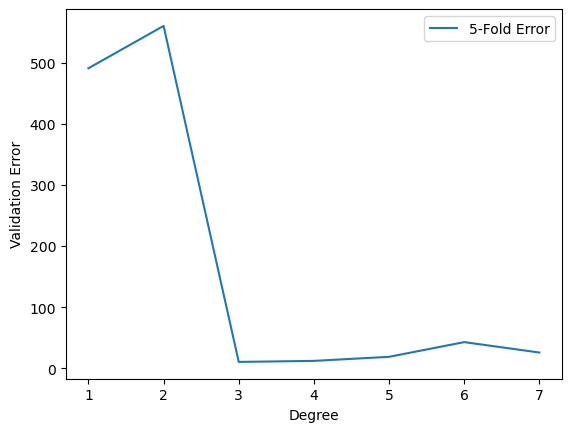

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV_by_degree["Degree"], kfoldCV_by_degree["Validation Error"], label="5-Fold Error")
ax.set_xlabel("Degree")
ax.set_ylabel("Validation Error")
ax.legend(loc="best")

Text(0, 0.5, 'Errors')

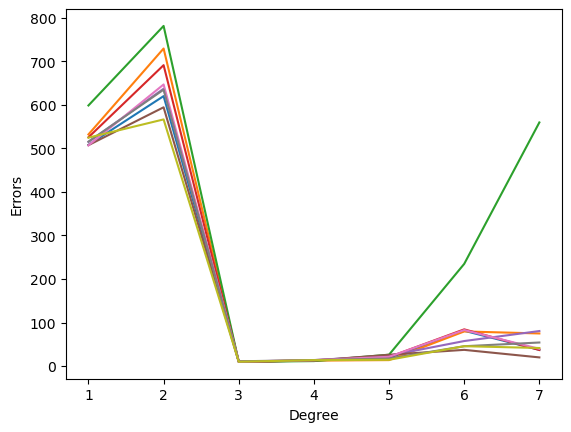

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range (1, 10):
    CVErrors = []
    cv = KFold(n_splits=5, shuffle=True, random_state=i)
    for j in range (1, 8):
        for train_index, validation_index in cv.split(x_train):
            x_trainv, x_valid = x_train[train_index], x_train[validation_index]
            y_trainv, y_valid = y_train[train_index], y_train[validation_index]
            CVErrors.append(create_polynomial_regression_model(j))
        df = pd.DataFrame(CVErrors, columns=["Traning Error", "Validation Error", "Degree"])
    kfoldCV_by_degree = df.groupby("Degree").mean()
    kfoldCV_by_degree = kfoldCV_by_degree.reset_index()
    ax.plot(kfoldCV_by_degree["Degree"], kfoldCV_by_degree["Validation Error"])
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')

In [29]:
kfoldCV_by_degree[["Degree", "Validation Error"]]

,Degree,Validation Error
0,1,524.520757
1,2,566.379773
2,3,9.935205
3,4,13.544290
4,5,14.397570
5,6,45.623574
6,7,41.462287


In [30]:
#Let's finally fit a model with a chosen order of polynomial
poly_features = PolynomialFeatures(degree=3, include_bias=False)

x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

y_predict = poly_model.predict(x_test_poly)
mean_squared_error(y_test, y_predict)

10.422657803430786

In [31]:
#Let's predict all data target
poly_features = PolynomialFeatures(degree=3, include_bias=False)

x_poly = poly_features.fit_transform(x)

poly_model = LinearRegression()
poly_model.fit(x_poly, y)

all_y_predict = poly_model.predict(x_poly)
mean_squared_error(y, all_y_predict)

8.602520876415438

Text(0, 0.5, 'Y')

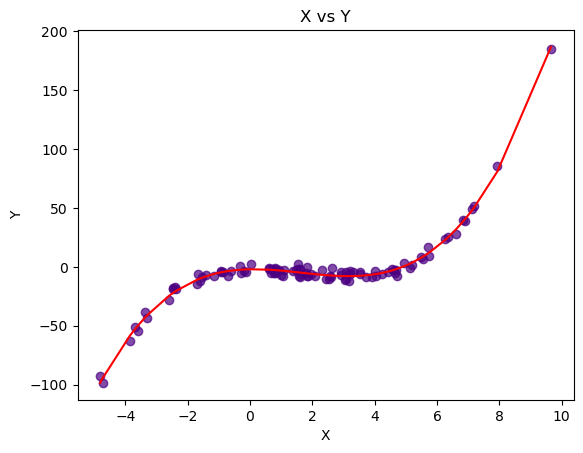

In [32]:
plt.scatter(x, y, marker="o", color="indigo", alpha=0.7)
plt.plot(x, all_y_predict, c="red")
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")

# Cross Validation Score

In [33]:
# Splitting train and test data for LeaveOneOut
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
    
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])
    
    return model

In [36]:
model = create_polynomial_regression_model(3)
scores = cross_val_score(model, x_train, y_train, cv=LeaveOneOut(), scoring="neg_mean_squared_error")

In [37]:
mse_scores = -scores
mse_scores.mean()

10.145967856487776

,Validation Errors,Count
Degree,,
1,448.645387,10
2,540.672284,10
3,10.058689,10
4,11.862133,10
5,17.451690,10
6,43.283629,10
7,148.498915,10


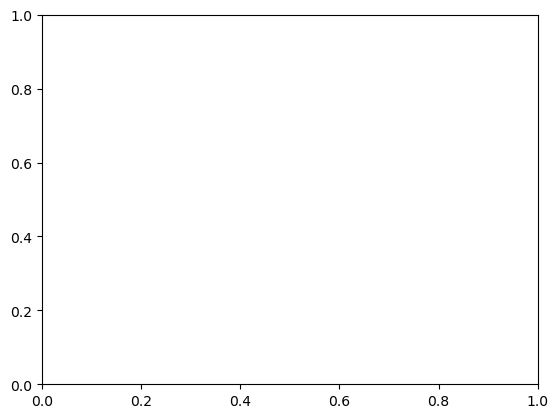

In [38]:
all_CVErrors = []
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for j in range(1, 11):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=j)
    CVErrors = []
    for i in range(1, 8):
        model = create_polynomial_regression_model(i)
        scores = cross_val_score(model, x_train, y_train, cv=LeaveOneOut(), scoring="neg_mean_squared_error")
        CVErrors.append([-scores.mean(), i, j])
    all_CVErrors.extend(CVErrors)

df = pd.DataFrame(all_CVErrors, columns=["Validation Errors", "Degree", "Random State"])
average_df = df.groupby("Degree").agg({"Validation Errors": "mean", "Random State": "count"}).rename(columns={"Random State": "Count"})
average_df

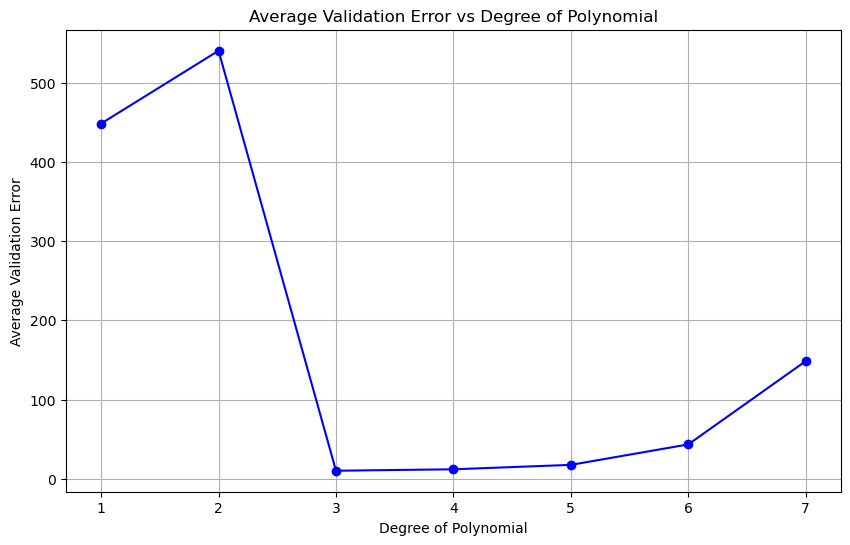

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(average_df.index, average_df["Validation Errors"], marker='o', linestyle='-', color='b')
plt.title("Average Validation Error vs Degree of Polynomial")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Average Validation Error")
plt.grid(True)
plt.show()

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [41]:
model = create_polynomial_regression_model(3)
scores = cross_val_score(model, x_train, y_train, cv=KFold(n_splits=10, random_state=1, shuffle=True), scoring="neg_mean_squared_error")

In [42]:
-scores.mean()

10.138016631295299

In [43]:
CVErrors = []
for i in range(1, 8):
    model = create_polynomial_regression_model(i)
    scores = cross_val_score(model, x_train, y_train, cv=KFold(n_splits=10, random_state=1, shuffle=True), \
                             scoring="neg_mean_squared_error")
    CVErrors.append([-scores.mean(), i])
df = pd.DataFrame(CVErrors, columns=["Validation Errors", "Degree"])
df

,Validation Errors,Degree
0,493.228936,1
1,587.196672,2
2,10.138017,3
3,12.936472,4
4,23.030631,5
5,48.178779,6
6,44.308393,7


Text(0, 0.5, 'Errors')

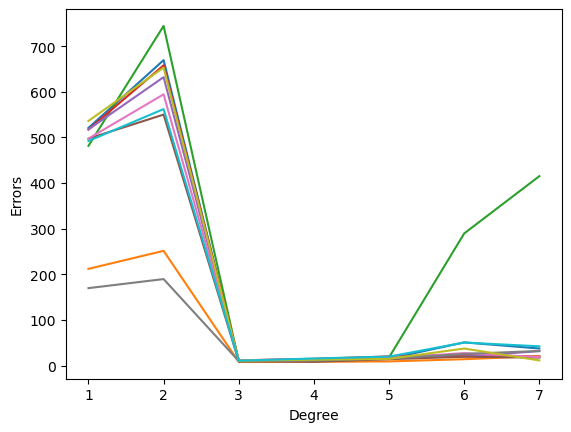

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for j in range (1, 11):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=j)
    CVErrors = []
    for i in range(1, 8):
        model = create_polynomial_regression_model(i)
        scores = cross_val_score(model, x_train, y_train, cv=KFold(n_splits=10, random_state=1, shuffle=True), \
                                 scoring="neg_mean_squared_error")
        CVErrors.append([-scores.mean(), i])
    df = pd.DataFrame(CVErrors, columns=["Validation Error", "Degree"])
    ax.plot(df['Degree'].values, df['Validation Error'].values, label = 'Training Error')

ax.set_xlabel("Degree")
ax.set_ylabel("Errors")